# Introduction

**In this project, we will explore stock market data which mainly focus on the top 50 stocks  of nifty index. It is also known as Nifty 50 index, which includes only top 50 stocks from indian stock exchange NSE. Hence, our motto is to analyze and perform exploratory data analysis (EDA) by using python's great and powerful libraries like Pandas, NumPy, Matplotlib, and Seaborn. Through this exploration, we will try to find trends, patterns, insights within the dataset.**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
#Defining directory path

directory_path = ('/kaggle/input/nifty50-stock-market-data') 

In [3]:
files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

**Concatinating / Combining all the files into a single df**

In [4]:
stock_df = [pd.read_csv(os.path.join(directory_path, file)) for file in files]
stock_market_df = pd.concat(stock_df, ignore_index = True)

In [5]:
#Loading whole dataset

print(stock_df)

[            Date    Symbol Series  Prev Close     Open     High      Low  \
0     2000-01-03  HDFCBANK     EQ      157.40   166.00   170.00   166.00   
1     2000-01-04  HDFCBANK     EQ      170.00   182.00   183.45   171.00   
2     2000-01-05  HDFCBANK     EQ      173.80   170.00   173.90   165.00   
3     2000-01-06  HDFCBANK     EQ      166.95   168.00   170.00   165.30   
4     2000-01-07  HDFCBANK     EQ      168.30   162.15   171.00   162.15   
...          ...       ...    ...         ...      ...      ...      ...   
5301  2021-04-26  HDFCBANK     EQ     1414.15  1413.00  1429.00  1402.75   
5302  2021-04-27  HDFCBANK     EQ     1404.80  1407.25  1442.00  1404.80   
5303  2021-04-28  HDFCBANK     EQ     1438.70  1436.25  1479.00  1431.00   
5304  2021-04-29  HDFCBANK     EQ     1476.80  1486.20  1503.65  1461.00   
5305  2021-04-30  HDFCBANK     EQ     1472.50  1445.00  1453.80  1407.50   

         Last    Close     VWAP    Volume      Turnover    Trades  \
0      170.00   1

In [6]:
#Using head() for extracting top 5 records

stock_market_df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Company Name,Industry,ISIN Code
0,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259.0,5.638122e+11,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710.0,2.952261e+12,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820.0,2.704094e+12,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026.0,1.432166e+12,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144.0,1.420158e+12,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#To get the sum of total number of null values

stock_market_df.isnull().sum()

Date                      50
Symbol                     0
Series                     0
Prev Close                50
Open                      50
High                      50
Low                       50
Last                      50
Close                     50
VWAP                      50
Volume                    50
Turnover                  50
Trades                229746
Deliverable Volume     32204
%Deliverble            32204
Company Name          470384
Industry              470384
ISIN Code             470384
dtype: int64

**As we have lots of null values hence either we can drop them or fill them**

In [8]:
#By mean we can fill the null values. It can be filled at place of int, float and complex numbers.

stock_market_df_filling = stock_market_df.apply(lambda x: x.fillna(x.mean()) if x.dtype.kind in 'bifuc' else x)
stock_market_df_filling.isnull().sum()

Date                      50
Symbol                     0
Series                     0
Prev Close                 0
Open                       0
High                       0
Low                        0
Last                       0
Close                      0
VWAP                       0
Volume                     0
Turnover                   0
Trades                     0
Deliverable Volume         0
%Deliverble                0
Company Name          470384
Industry              470384
ISIN Code             470384
dtype: int64

In [9]:
#As we can see after dropping there are no null values

stock_market_df_cleaning = stock_market_df.dropna()
stock_market_df_cleaning.isnull().sum()

Date                  0.0
Symbol                0.0
Series                0.0
Prev Close            0.0
Open                  0.0
High                  0.0
Low                   0.0
Last                  0.0
Close                 0.0
VWAP                  0.0
Volume                0.0
Turnover              0.0
Trades                0.0
Deliverable Volume    0.0
%Deliverble           0.0
Company Name          0.0
Industry              0.0
ISIN Code             0.0
dtype: float64

In [10]:
#We can check the datatypes of all columns by using dtypes

stock_market_df_cleaning.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                float64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
Company Name           object
Industry               object
ISIN Code              object
dtype: object

In [11]:
#Empty dataset as we dropped all the values, every row/column may contains null values that's why.

stock_market_df_cleaning 

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Company Name,Industry,ISIN Code


**1. How can we find out the average closing price for each stock?**

In [12]:
average_closing_price = stock_market_df_filling.groupby('Symbol')['Close'].mean()
average_closing_price

Symbol
ADANIPORTS     294.323213
ASIANPAINT    1247.412707
AXISBANK       824.124076
BAJAJ-AUTO    2190.267955
BAJAJFINSV    2758.424419
                 ...     
UTIBANK        163.126203
VEDL           183.658838
WIPRO          754.523033
ZEEL           297.655527
ZEETELE        225.774415
Name: Close, Length: 66, dtype: float64

We can see the plot for average closing price 

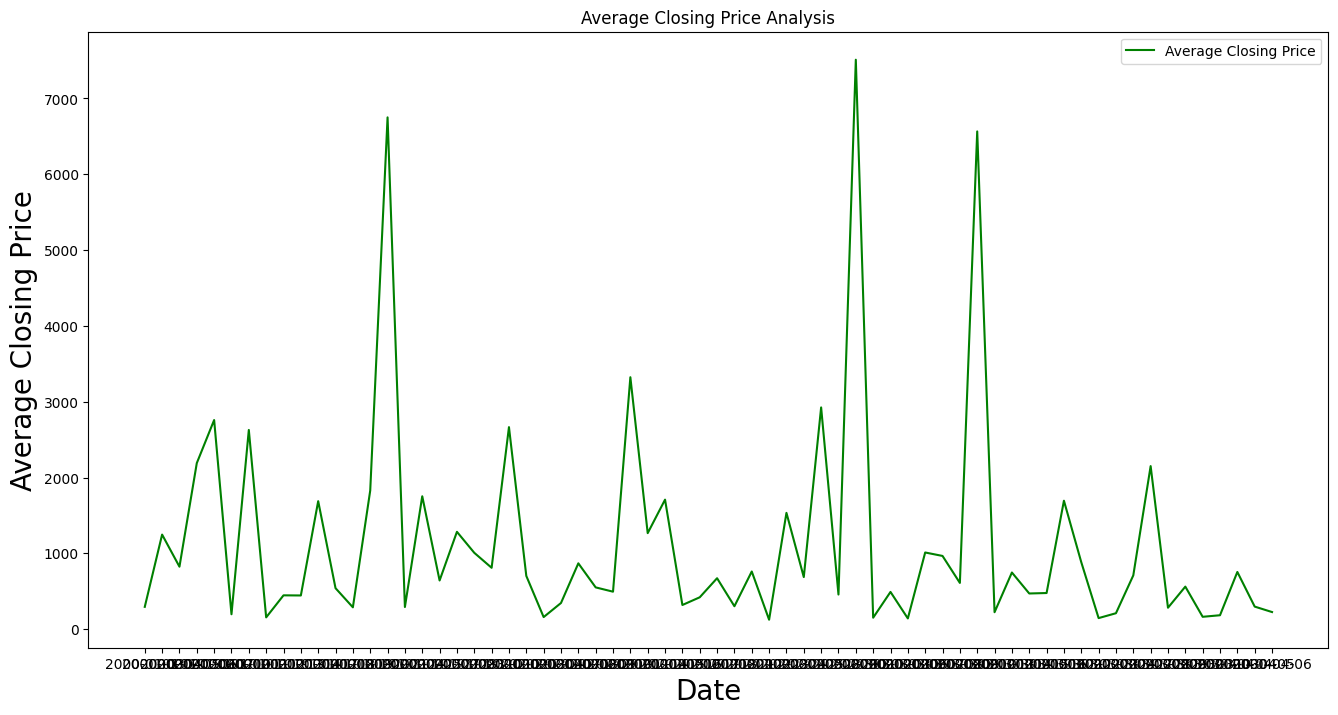

In [13]:
stock_market_df['Date'] = stock_market_df['Date'].astype(str)

stock_market_df_subset = stock_market_df.iloc[:len(average_closing_price)]

plt.figure(figsize=(16, 8))
plt.title('Average Closing Price Analysis')
plt.plot(stock_market_df_subset['Date'], average_closing_price, label='Average Closing Price', color = 'green')
plt.xlabel('Date', fontsize = 20)
plt.ylabel('Average Closing Price', fontsize = 20)
plt.legend()
plt.show()

**2. Closing price for each stock can be seen through another plot**

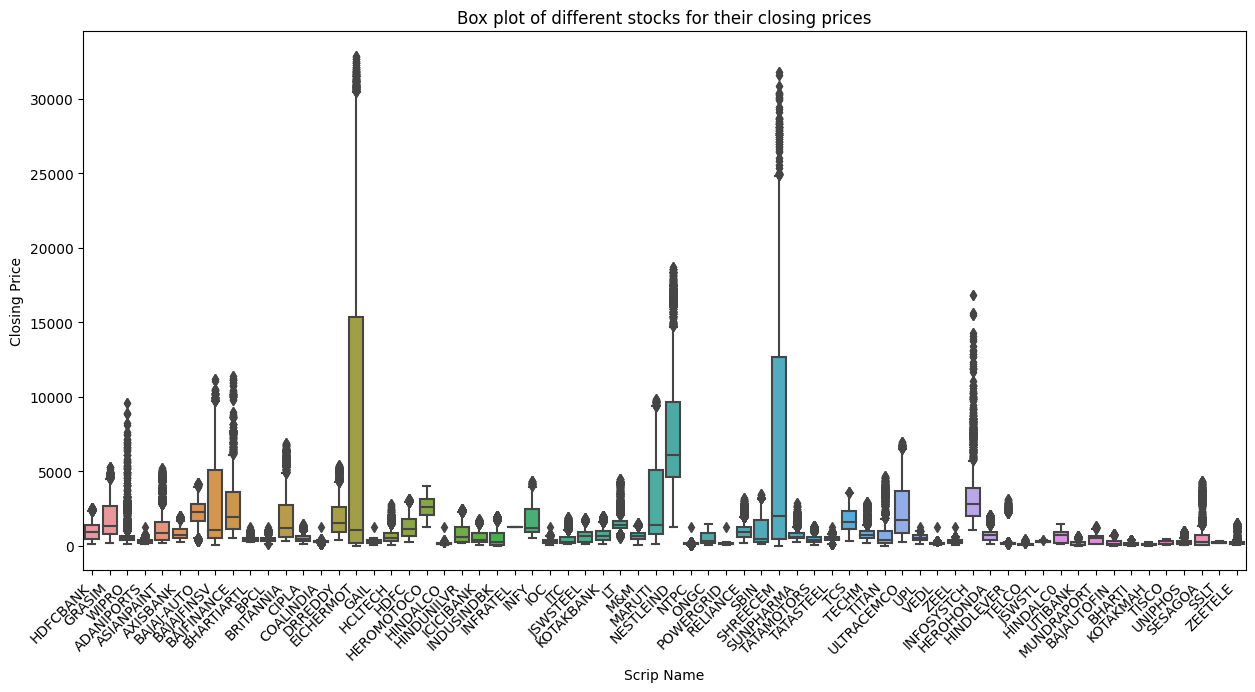

In [14]:
stock_market_df_cleaning['Symbol'] = stock_market_df_cleaning['Symbol'].astype('category')

plt.figure(figsize=(15,7))
sns.boxplot(x='Symbol', y='Close', data = stock_market_df_filling, whis = 1)
plt.title('Box plot of different stocks for their closing prices')
plt.xlabel('Scrip Name')
plt.ylabel('Closing Price')
plt.xticks(rotation = 45, ha = 'right',fontsize = 10)
plt.show()

**3. If we want to analyze the stocks of same segment or branch then multiple stocks can be compared by using line plot**

In [15]:
#To compare two or more stocks, reading the file from read_csv method

df_scrip1 = pd.read_csv('/kaggle/input/nifty50-stock-market-data/BAJAJFINSV.csv')
df_scrip2 = pd.read_csv('/kaggle/input/nifty50-stock-market-data/BAJFINANCE.csv')
df_scrip3 = pd.read_csv('/kaggle/input/nifty50-stock-market-data/HDFC.csv')

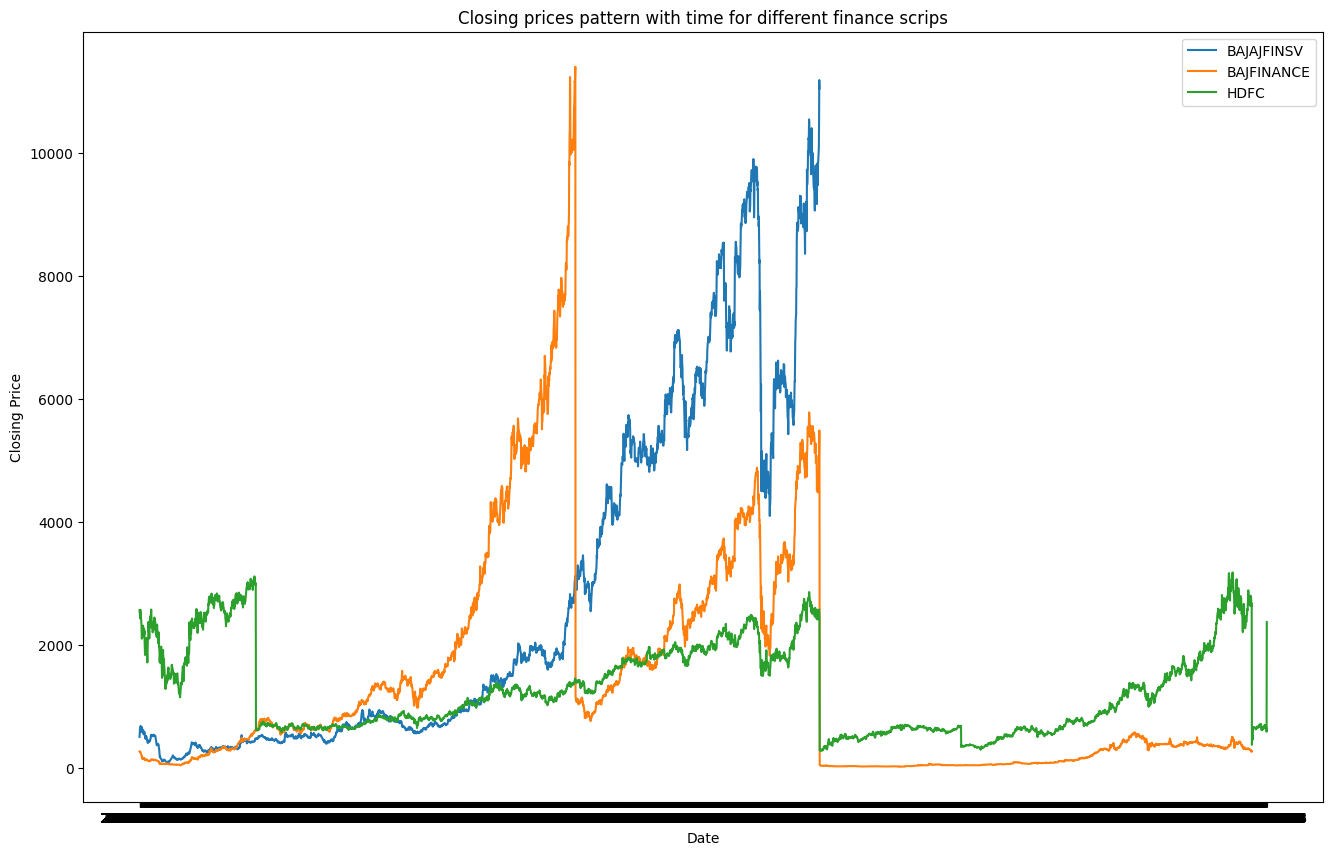

In [16]:
#Plotting line chart for comparison three relevant stocks over time

plt.figure(figsize = (16, 10))
sns.lineplot(x = 'Date', y = 'Close', data = df_scrip1, label = 'BAJAJFINSV') #For Bajajfinsv
sns.lineplot(x = 'Date', y = 'Close', data = df_scrip2, label = 'BAJFINANCE') #For Bajajfinance
sns.lineplot(x = 'Date', y = 'Close', data = df_scrip3, label = 'HDFC')       #For HDFC
plt.title('Closing prices pattern with time for different finance scrips')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

**4. If we want to show the co-relation between two or more stocks then it can be shown by Heatmap Plot.**

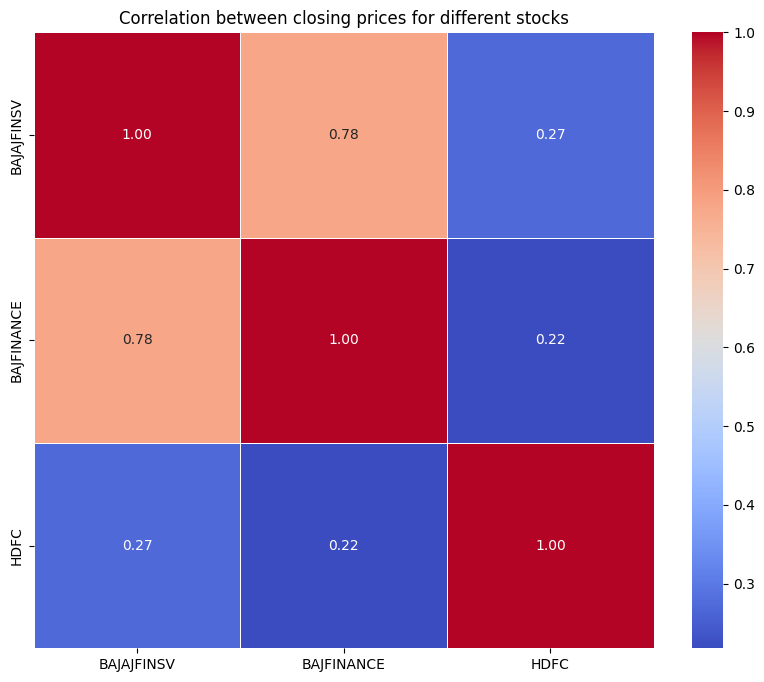

In [17]:
#Considering the same three stocks from finance segment

stock_market_df_combined_close = pd.concat([
    df_scrip1['Close'],
    df_scrip2['Close'],
    df_scrip3['Close']], axis = 1, keys = ['BAJAJFINSV', 'BAJFINANCE', 'HDFC'])

#Calculating correlation matrix

correlation_matrix = stock_market_df_combined_close.corr()   

#Plotting heatmap chart for showing co-relation

plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f', linewidths = .5)
plt.title('Correlation between closing prices for different stocks')
plt.show()

# Summary

**In this notebook we analyzed the dataset of a Stock Market (Nifty's top 50 stocks). In which we used pandas and dataframe concepts. To analyze and visualize time series data we used libraries like Pandas, Matplotlib and Seaborn. Also tried to achieve relationships between different stocks.**